# EDA

## Initialization

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\anaconda\envs\geopandas_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns

import igraph

from geopandas import GeoDataFrame
from pyrosm import OSM

In [3]:
# Self-made modules
import helpers as hp

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Inputs

In [5]:
buildings_int_path = '../data/02_intermediate/buildings_data/'
plz_ags_csv = '../data/01_raw/zuordnung_plz_ort_landkreis.csv'

# Demographics
ags_living_csv = '../data/01_raw/de_living_2019.csv'
ags_population_csv = '../data/01_raw/de_population_2019.csv'

In [6]:
ags_living = pd.read_csv(ags_living_csv, 
                         sep = ';', 
                         encoding = 'cp1250', 
                         dtype= {'1_Auspraegung_Code':str},
                         low_memory = False)
ags_population = pd.read_csv(ags_population_csv, 
                             sep = ';', 
                             dtype= {'1_Auspraegung_Code':str},
                             encoding = 'cp1250', 
                             low_memory = False)

In [7]:
plz_ags = pd.read_csv(plz_ags_csv, dtype= {'plz': str, 'ags': str})

AGS Living

In [8]:
ags_living.rename(columns = {'1_Auspraegung_Code':'ags',
                            '1_Auspraegung_Label':'place',
                            '2_Auspraegung_Label':'indication',
                            '2_Merkmal_Label':'measurement_type'}, inplace = True)

In [9]:
ags_living.ags.nunique()

13914

In [10]:
ags_living['ags'] = np.where(ags_living.ags.str.len() < 8, ags_living.ags.str.ljust(8,'0'), ags_living.ags)

In [11]:
ags_living[ags_living.ags.str.len()==8][['ags']].nunique()

ags    13914
dtype: int64

AGS Population

In [49]:
ags_population.ags.nunique()

13556

In [50]:
ags_population[ags_population.ags.str.len()==8][['ags']].nunique()

ags    13556
dtype: int64

In [37]:
ags_population.rename(columns = {'1_Auspraegung_Code':'ags',
                                 '1_Auspraegung_Label':'place',
                                 '2_Auspraegung_Label':'gender',
                                 '3_Auspraegung_Label':'age_group'}, inplace = True)

In [47]:
ags_population['ags'] = np.where(ags_population.ags.str.len() < 8, ags_population.ags.str.ljust(8,'0'), ags_population.ags)

In [48]:
ags_population[ags_population.ags == '01004000']

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,ags,place,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,gender,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,age_group,BEVSTD__Bevoelkerungsstand__Anzahl
162,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT000B03,unter 3 Jahre,2145
163,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT003B06,3 bis unter 6 Jahre,2167
164,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT006B10,6 bis unter 10 Jahre,2814
165,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT010B15,10 bis unter 15 Jahre,3726
166,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT015B18,15 bis unter 18 Jahre,2268
167,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT018B20,18 bis unter 20 Jahre,1893
168,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT020B25,20 bis unter 25 Jahre,4826
169,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT025B30,25 bis unter 30 Jahre,5098
170,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT030B35,30 bis unter 35 Jahre,5157
171,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT035B40,35 bis unter 40 Jahre,4657


In [ ]:
ags_living[ags_living.ags == '01004']

In [ ]:
ags_living.ags.nunique()

In [ ]:
# Check for progress of already enhanced areas
name_list = os.listdir(buildings_int_path)
name_list[0:10]

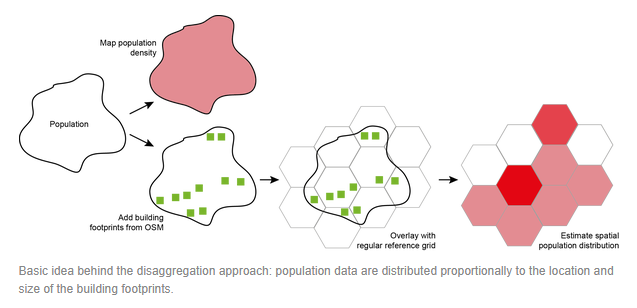

## Plot examples

In [ ]:
id = 10

In [ ]:
df = pd.read_csv(os.path.join(buildings_int_path,name_list[id]))
boundary_id = name_list[id].split('.')[0].split('_')[2]
boundary_id

In [ ]:
# Haar
df = pd.read_csv(os.path.join(buildings_int_path, 'buildings_ags_09184123.csv'))

In [ ]:
df.shape

In [ ]:
df.building_types.value_counts()

## Get the number of residential buildings from officials

In [ ]:
ags_living['place'] = ags_living['place'].apply(lambda x: x.strip())

In [ ]:
# Total buildings in the area that are classified as "residentials"
official_res_count = int(ags_living[(ags_living.place == 'Haar') &
                                    (ags_living.measurement_type == 'Wohngebäude nach Anzahl der Wohnungen') &
                                    (ags_living.indication == 'Insgesamt')].BAUNW9__Wohngebaeude__Anzahl.iloc[0])
official_res_count
# ags_living[ags_living.ags == boundary_id]

In [ ]:
osm_res_count = df[df.building_types == 'residential'].shape[0]
osm_res_count

In [ ]:
diff = osm_res_count-official_res_count
diff

In [ ]:
round((abs(diff)/official_res_count)*100,2)

In [ ]:
def get_diff_residential_count():
    """
    Calculate the difference between area's official residential buildings count vs OSM count
    
    Args:
        ags_living: official residential buildings dataset from Germany Statistical Office
        ags_osm: preprocessed data in a AGS (municipal) area from OSM and Geofabrik with preliminary classification for building types
    """
    
    

# DEV

In [ ]:
from shapely import wkt
# Filter out NaN
df = df[df.geometry.isna() == False].reset_index(drop = True)

# Convert geometry to GeoSeries
df['geometry'] = df['geometry'].apply(wkt.loads)
# Convert to GeoPandas type
df_geo = GeoDataFrame(df, geometry='geometry')

In [ ]:
df_geo = hp._swap_2_cols(df_geo, 'id','center.lon')
df_geo = hp._swap_2_cols(df_geo, 'type','center.lat')

df_geo.rename(columns = {'center.lat':'lat',
                        'center.lon':'lon'}, inplace = True)

In [ ]:
# Plot
ax =   df_geo.plot(column='building_types', 
               markersize=3, 
               figsize=(12,20), 
               legend=True, 
               legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))